# Practical work 08 - Clustering
Authors: Bastien Veuthey & Daniel Ribeiro Cabral

## Imports

In [1]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

from sphinx.addnodes import centered

## Exercise 1 - Getting the data

a) Load the two given datasets:

In [2]:
data1, label1 = pickle.load(open("dataset_1.pkl", "rb"), encoding ="latin1")
data2, label2 = pickle.load(open("dataset_2.pkl", "rb"), encoding ="latin1")

b) Visualize the data using various color for each unique labels

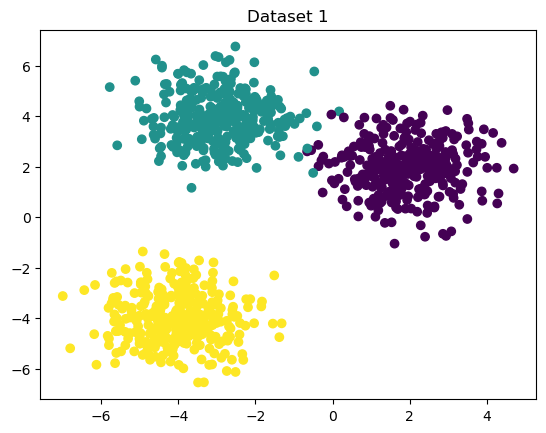

In [3]:
plt.scatter(data1[:,0], data1[:,1], c=label1)
plt.title("Dataset 1")
plt.show()

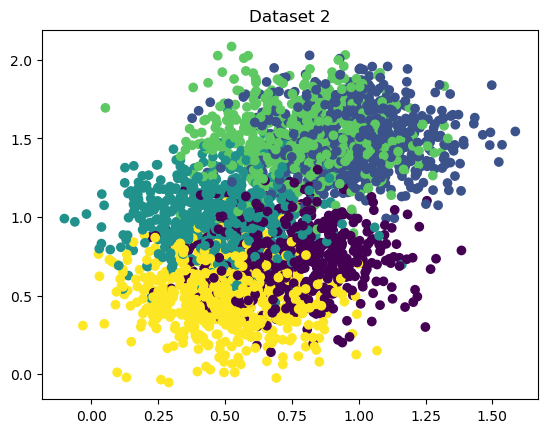

In [4]:
plt.scatter(data2[:,0], data2[:,1], c=label2)
plt.title("Dataset 2")
plt.show()

## Exercise 2 - The $k$-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [5]:
def init_centroids(data, k, seed=42):
    if seed is not None:
        np.random.seed(seed)  # Set the random seed

    return data[np.random.choice(data.shape[0], k, replace=False), :]

b) Until convergence :

<span style="margin-left: 20px;">i) Find the closest centroid for each point</span>

In [6]:
def find_closest_centroid_numpy_version(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    closest_centroids = np.argmin(distances, axis=1)
    return closest_centroids

<span style="margin-left: 20px;">ii) Reevaluate the centroids</span>

In [7]:
def update_centroids(data, closest_centroids, k):
    new_centroids = []
    for index_clust in range(k):
        data_subset = data[closest_centroids == index_clust]
        if len(data_subset) > 0:
            new_centroids.append(data_subset.mean(axis=0))
    return np.array(new_centroids)

c) Return the $k$ centroids.

In [8]:
def kmeans(data, k, iter=1000,  convergence_threshold=0.01):
    centroids = init_centroids(data, k) # intialize the centroids
    y_pred = []
    prev_centroids = centroids.copy()  # Initialize previous centroids for comparison
    cost_values = []
    
    iteration = 0
    while iteration < iter:
        closest_centroids = find_closest_centroid_numpy_version(data, centroids)
        centroids = update_centroids(data, closest_centroids, k)
        y_pred = closest_centroids
        
        # Convergence check
        centroid_diff = np.linalg.norm(centroids - prev_centroids, axis=1).mean()
        cost_values.append(centroid_diff)
        if centroid_diff < convergence_threshold: # if converge smaller then stop the iterations
            break
        prev_centroids = centroids.copy() 
        iteration += 1
    return y_pred, centroids, cost_values

We also ask you to define and implement strategies for the :

* Initialisation of the centroids.
* Convergence criteria.

## Exercise 3 - Evaluate your model

Run your algorithm with the dataset 1.

In [9]:
y_pred_values, centre, cost = kmeans(data1, 3)

Visualize your convergence criteria over the epochs using the dataset 1.

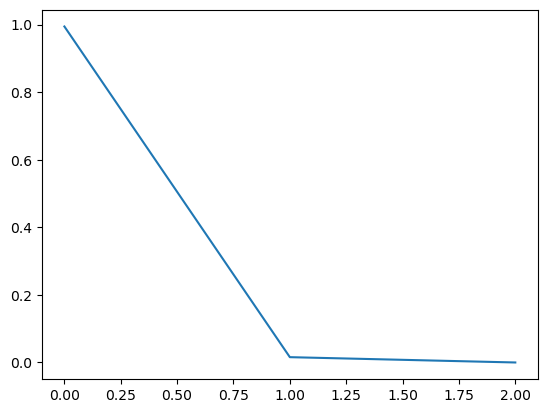

In [10]:
plt.plot(cost)

Visualize the output of your $k$-means on the dataset 1.

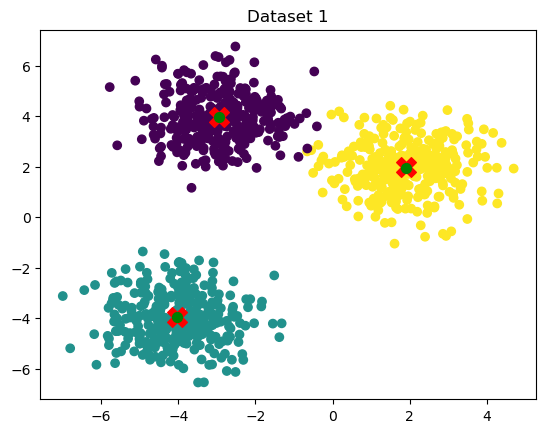

In [11]:
dataset_1_size = data1.shape[0]
true_centroids_data1 = np.array([
    np.mean(data1[:dataset_1_size, 0][label1 == 0]),
    np.mean(data1[:dataset_1_size, 1][label1 == 0]),
    np.mean(data1[:dataset_1_size, 0][label1 == 1]),
    np.mean(data1[:dataset_1_size, 1][label1 == 1]),
    np.mean(data1[:dataset_1_size, 0][label1 == 2]),
    np.mean(data1[:dataset_1_size, 1][label1 == 2]),
]) 
tab = true_centroids_data1.reshape(3, 2) 

plt.scatter(data1[:, 0], data1[:, 1], c=y_pred_values)
plt.scatter(centre[:, 0], centre[:, 1], marker='X', s=200, c='red', label='Predicted Centroids')
plt.scatter(tab[:, 0], tab[:, 1], marker='.', s=200, c='green', label='True Centroids')
plt.title("Dataset 1")
plt.show()

In [12]:
number_of_corrects = 0
for i in range(len(label1)):
    if label1[i] == 0:
        if y_pred_values[i] == 2:
            number_of_corrects += 1
    elif label1[i] == 1:
        if y_pred_values[i] == 0:
            number_of_corrects += 1
    else:  # Label is 2
        if y_pred_values[i] == 1:
            number_of_corrects += 1
print("Accuracy:", number_of_corrects/len(label1))

Accuracy: 0.998


**Do you experience sensitivity to the initial values of the centroids? Is your strategy for initialization working well in most cases?**

Based on the theory, we can suppose that the initial values can impact the final result we will have. But in out case weh dont experience sensitivity to the inivutal values. The strategy I use is to just select k random points in the dataset. And in our cas this value works well.

**Document your convergence criteria. Could you think about other convergence criteria?**

The k-means algorithm in our code utilizes two convergence criteria to determine when to stop iterating and return the final clustering results. These criteria are:

- **Centroid Change Threshold** :  This criteria monitors the change in the centroids between iterations. If the average change in centroids falls below a specified threshold (convergence_threshold), the algorithm stops iterating. This indicates that the centroids have stabilized and the clustering results have likely converged.
- **Maximum Iterations** : This criterion sets a limit on the number of iterations the algorithm will run, even if the convergence threshold is not reached. This prevents the algorithm from running indefinitely and ensures that it terminates at some point.

The default value for the convergence_threshold is 0.01, indicating that the algorithm stops when the average change in centroids is less than 1%. 

- **Within-Cluster Variance** (https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/41d1a6d4e7574e32b815f1cc87c00f42/ef8c3db2ccc74252bfae85b1f24a3766.html) : his criterion measures the average variance within each cluster. A low WCV indicates that the data points within each cluster are tightly packed together, suggesting that the clustering is effective-
- **Between-Cluster Distance** : : This criterion measures the distance between the centroids of different clusters. A high BCD indicates that the clusters are well-separated, suggesting that the clustering is effective. The algorithm can be stopped when the BCD reaches a maximum value.


Run your algorithm with the dataset 2.

In [18]:
y_pred_values_data2, centre_data2, cost_data2 = kmeans(data2, 5)

Visualize your convergence criteria over time using the dataset 2.

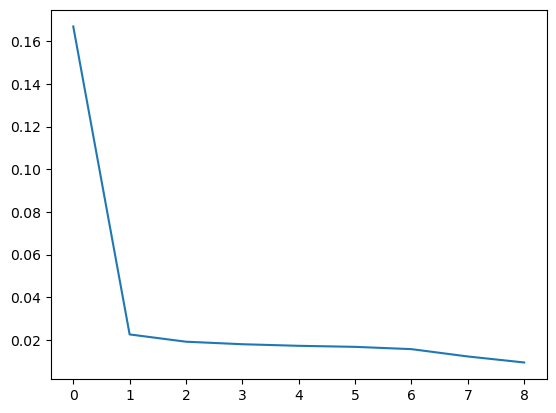

In [19]:
plt.plot(cost_data2)

Visualize the output of your $k$-means on the dataset 2 and comment your results.

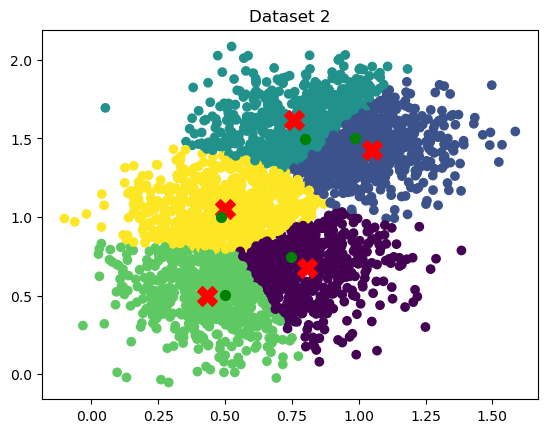

In [22]:
dataset_2_size = data2.shape[0]
num_centroids = 5  # Adjust the number of centroids to match the number of labels

true_centroids_data2 = np.empty((num_centroids, 2))

for label_index in range(num_centroids):
    centroid_coordinates = np.mean(data2[:dataset_2_size, :][label2 == label_index], axis=0)
    true_centroids_data2[label_index] = centroid_coordinates


tab_data2 = true_centroids_data2.reshape(num_centroids, 2)

plt.scatter(data2[:, 0], data2[:, 1], c=y_pred_values_data2)
plt.scatter(centre_data2[:, 0], centre_data2[:, 1], marker='X', s=200, c='red', label='Predicted Centroids')

for i in range(num_centroids):
    plt.scatter(tab_data2[i, 0], tab_data2[i, 1], marker='.', s=200, c='green', label='True Centroid ' + str(i+1))

plt.title("Dataset 2")
plt.show()

In our case, we can clearly identify several well-separated clusters, which is not exactly the same to what we expected at the beginning of the lab. We also see that the predicted centroids are not the same as the true centroids.